### Syed Khundmir Azmi

# Stock Market Prediction using Numerical and Textual Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Abid\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# !pip3 install vaderSentiment

In [3]:
#Loading Datasets
df = pd.read_excel('yahoo finance.xlsx',header = 1,index_col = 'Date')

In [4]:
df.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-06-04,52367.52,52389.02,51952.7,52100.05,52100.05,16700
2021-06-03,52121.58,52273.23,51942.2,52232.43,52232.43,15000
2021-06-02,51749.1,51913.92,51450.58,51849.48,51849.48,13500
2021-06-01,52067.51,52228.65,51808.88,51934.88,51934.88,13400
2021-05-31,51476.22,52013.22,51179.94,51937.44,51937.44,15300


In [5]:
df.tail()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2020-06-10,34029.14,34350.17,33949.46,34247.05,34247.05,15500
2020-06-09,34520.79,34811.29,33881.19,33956.69,33956.69,19200
2020-06-08,34841.17,34927.8,34211.83,34370.58,34370.58,25700
2020-06-05,34198.55,34405.43,33958.02,34287.24,34287.24,24600
2020-06-04,34072.5,34310.14,33711.24,33980.7,33980.7,17900


In [6]:
headlines = pd.read_csv('india-news-headlines.csv',date_parser = 'publish_date')

In [7]:
headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


## Feature Engineering

In [8]:
#Imputing publish_date to date type
headlines['publish_date'] = pd.to_datetime(headlines['publish_date'], format='%Y%m%d')

In [9]:
headlines.drop(columns = 'headline_category',inplace = True)

In [10]:
headlines.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [11]:
headlines.tail()

,publish_date,headline_text
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...
3424066,2020-12-31,Celebs plan to party safely and responsibly on...


In [12]:
stock_headlines = headlines.groupby('publish_date')['headline_text'].sum()

In [13]:
stock_headlines = pd.DataFrame(stock_headlines)

In [14]:
stock_headlines.head()

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,Powerless north India gropes in the darkThink ...
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...


In [15]:
df.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-06-04,52367.52,52389.02,51952.7,52100.05,52100.05,16700
2021-06-03,52121.58,52273.23,51942.2,52232.43,52232.43,15000
2021-06-02,51749.1,51913.92,51450.58,51849.48,51849.48,13500
2021-06-01,52067.51,52228.65,51808.88,51934.88,51934.88,13400
2021-05-31,51476.22,52013.22,51179.94,51937.44,51937.44,15300


In [16]:
df.reset_index(inplace = True)
stock_headlines.reset_index(inplace = True)

In [17]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-06-04,52367.52,52389.02,51952.7,52100.05,52100.05,16700
1,2021-06-03,52121.58,52273.23,51942.2,52232.43,52232.43,15000
2,2021-06-02,51749.1,51913.92,51450.58,51849.48,51849.48,13500
3,2021-06-01,52067.51,52228.65,51808.88,51934.88,51934.88,13400
4,2021-05-31,51476.22,52013.22,51179.94,51937.44,51937.44,15300


In [18]:
stock_headlines.rename(columns = {'publish_date': 'Date','headline_text':'Headlines'},inplace = True)

In [19]:
# stock_data = pd.concat([df,stock_headlines],axis = 1).dropna()
stock_data = df.merge(stock_headlines,how = 'inner',on = 'Date',sort = True)

In [20]:
stock_data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Headlines
0,2020-06-04,34072.5,34310.14,33711.24,33980.7,33980.7,17900,NMC plans 100-bed centre in ESI HospitalGarmen...
1,2020-06-05,34198.55,34405.43,33958.02,34287.24,34287.24,24600,Woman electrocuted in Deolali CampWorld Enviro...
2,2020-06-08,34841.17,34927.8,34211.83,34370.58,34370.58,25700,DK KSRTC loses Rs 86 cr during lockdownVasco s...
3,2020-06-09,34520.79,34811.29,33881.19,33956.69,33956.69,19200,New library with 49k books opens in Madikeri63...
4,2020-06-10,34029.14,34350.17,33949.46,34247.05,34247.05,15500,Wearing PPE kits can be cumbersome; but custom...


In [21]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         148 non-null    datetime64[ns]
 1   Open         148 non-null    object        
 2   High         148 non-null    object        
 3   Low          148 non-null    object        
 4   Close*       148 non-null    object        
 5   Adj Close**  148 non-null    object        
 6   Volume       148 non-null    object        
 7   Headlines    148 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.4+ KB


In [22]:
#Type casting Open column
stock_data['Open'].replace('-',np.nan,inplace = True)
stock_data['Open'].fillna(stock_data['Open'].mean(),inplace = True)
stock_data['Open'] = pd.to_numeric(stock_data['Open'])

In [23]:
#Type casting High column
stock_data['High'].replace('-',np.nan,inplace = True)
stock_data['High'].fillna(stock_data['High'].mean(),inplace = True)
stock_data['High'] = pd.to_numeric(stock_data['High'])

In [24]:
#Type casting Low column
stock_data['Low'].replace('-',np.nan,inplace = True)
stock_data['Low'].fillna(stock_data['Low'].mean(),inplace = True)
stock_data['Low'] = pd.to_numeric(stock_data['Low'])

In [25]:
#Type casting Close* column
stock_data['Close*'].replace('-',np.nan,inplace = True)
stock_data['Close*'].fillna(stock_data['Close*'].mean(),inplace = True)
stock_data['Close*'] = pd.to_numeric(stock_data['Close*'])

In [26]:
#Type casting Adj Close** column
stock_data['Adj Close**'].replace('-',np.nan,inplace = True)
stock_data['Adj Close**'].fillna(stock_data['Adj Close**'].mean(),inplace = True)
stock_data['Adj Close**'] = pd.to_numeric(stock_data['Adj Close**'])

In [27]:
#Type casting Volume column
stock_data['Volume'].replace('-',np.nan,inplace = True)
stock_data['Volume'].fillna(stock_data['Volume'].mean(),inplace = True)
stock_data['Volume'] = pd.to_numeric(stock_data['Volume'])

In [28]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         148 non-null    datetime64[ns]
 1   Open         148 non-null    float64       
 2   High         148 non-null    float64       
 3   Low          148 non-null    float64       
 4   Close*       148 non-null    float64       
 5   Adj Close**  148 non-null    float64       
 6   Volume       148 non-null    float64       
 7   Headlines    148 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 9.8+ KB


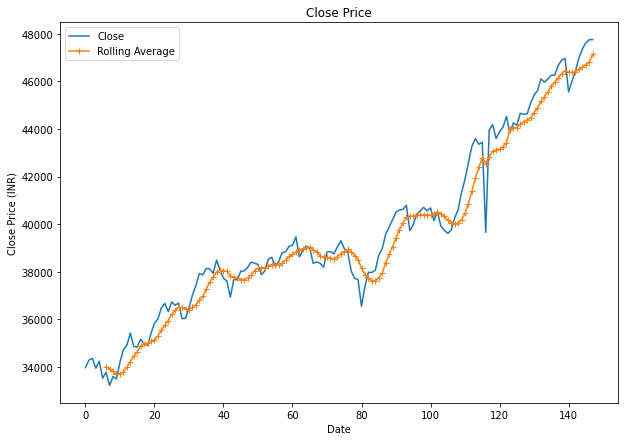

In [29]:
# setting figure size
plt.figure(figsize=(10,7))

# plotting the close price and a 7-day rolling mean of close price
stock_data['Close*'].plot(label = 'Close')
stock_data.rolling(window=7).mean()['Close*'].plot(marker = '+',label = 'Rolling Average')




plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()

In [30]:
stock_data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Headlines
0,2020-06-04,34072.50,34310.14,33711.24,33980.70,33980.70,17900.0,NMC plans 100-bed centre in ESI HospitalGarmen...
1,2020-06-05,34198.55,34405.43,33958.02,34287.24,34287.24,24600.0,Woman electrocuted in Deolali CampWorld Enviro...
2,2020-06-08,34841.17,34927.80,34211.83,34370.58,34370.58,25700.0,DK KSRTC loses Rs 86 cr during lockdownVasco s...
3,2020-06-09,34520.79,34811.29,33881.19,33956.69,33956.69,19200.0,New library with 49k books opens in Madikeri63...
4,2020-06-10,34029.14,34350.17,33949.46,34247.05,34247.05,15500.0,Wearing PPE kits can be cumbersome; but custom...


In [31]:
sid.polarity_scores('hey baliq go whats up')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [32]:
#Sentiment Analysis

stock_data['compound'] = stock_data['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock_data['positive'] = stock_data['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])
stock_data['negative'] = stock_data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock_data['neutral'] = stock_data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])

In [33]:
stock_data.drop(columns = ['Headlines'],inplace = True)

In [34]:
stock_data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,compound,positive,negative,neutral
0,2020-06-04,34072.50,34310.14,33711.24,33980.70,33980.70,17900.0,-0.9994,0.076,0.103,0.821
1,2020-06-05,34198.55,34405.43,33958.02,34287.24,34287.24,24600.0,-0.9998,0.083,0.130,0.787
2,2020-06-08,34841.17,34927.80,34211.83,34370.58,34370.58,25700.0,-0.9996,0.087,0.128,0.785
3,2020-06-09,34520.79,34811.29,33881.19,33956.69,33956.69,19200.0,-0.9997,0.070,0.117,0.813
4,2020-06-10,34029.14,34350.17,33949.46,34247.05,34247.05,15500.0,-0.9997,0.105,0.142,0.752


In [35]:
stock_data.set_index('Date',inplace = True)

In [36]:
stock_data_scaled = stock_data.copy()

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
stock_data_scaled = pd.DataFrame(ss.fit_transform(stock_data_scaled),columns = stock_data_scaled.columns)

In [38]:
stock_data_scaled.head()

,Open,High,Low,Close*,Adj Close**,Volume,compound,positive,negative,neutral
0,-1.515146,-1.525938,-1.530911,-1.531519,-1.531519,-0.062033,-0.081181,-0.151921,-1.395561,1.063169
1,-1.481024,-1.499933,-1.464014,-1.448807,-1.448807,1.192517,-0.083626,0.433171,0.223209,-0.376903
2,-1.307070,-1.357380,-1.395211,-1.426320,-1.426320,1.398487,-0.082404,0.767510,0.103300,-0.461613
3,-1.393795,-1.389175,-1.484841,-1.537997,-1.537997,0.181387,-0.083015,-0.653428,-0.556199,0.724329
4,-1.526883,-1.515014,-1.466334,-1.459651,-1.459651,-0.511424,-0.083015,2.272032,0.942662,-1.859330


In [39]:
x = stock_data_scaled.drop(columns = 'Close*')
y = stock_data_scaled[['Close*']]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 0)

In [41]:
x_train.shape

(125, 9)

In [42]:
y_train.shape

(125, 1)

## Model Development

### Model-1 AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
adaboost = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(criterion = 'mse',ccp_alpha= 0.01),learning_rate = 0.5,
                            n_estimators = 100,random_state = 0)
adaboost.fit(x_train,y_train)

c:\users\abid\python 3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.01),
                  learning_rate=0.5, n_estimators=100, random_state=0)

In [44]:
y_pred1 = adaboost.predict(x_test)

#### Model Score, Feature Importances, Predicted vs Actual

In [45]:
from sklearn.metrics import r2_score
print("Model Score is: {}".format(r2_score(y_test,y_pred1)))

Model Score is: 0.9864173250791991


In [46]:
adaboost.feature_importances_

array([2.55308843e-01, 2.72103904e-01, 1.96059704e-01, 2.75209528e-01,
       1.10050058e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.17520497e-04])

In [47]:
y_test.head().values

array([[-0.897892  ],
       [-1.73439814],
       [-0.46463276],
       [ 0.99846847],
       [-0.79949316]])

In [48]:
y_pred1[:5]

array([-0.86314697, -1.45644847, -0.38218727,  1.10795161, -0.78311184])

### Model-2 Support Vector Machines

In [49]:
from sklearn.svm import SVR
svm = SVR(kernel = 'linear')
svm.fit(x_train,y_train)

c:\users\abid\python 3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [50]:
y_pred2 = svm.predict(x_test)

#### Model Score, Predicted vs Actual

In [51]:
from sklearn.metrics import r2_score
print("Model Score is: {}".format(r2_score(y_test,y_pred2)))

Model Score is: 0.9982722592177167


In [52]:
y_test.head().values

array([[-0.897892  ],
       [-1.73439814],
       [-0.46463276],
       [ 0.99846847],
       [-0.79949316]])

In [53]:
y_pred2[:5]

array([-0.85413944, -1.67288189, -0.4068588 ,  0.99809977, -0.75448161])